### Import packages

In [1]:
import pandas as pd; import os; from analysis_helpers import *; import warnings
from analysis_helpers import *
warnings.filterwarnings('ignore')
import seaborn as sb
import numpy as np
from scipy.interpolate import pchip
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema
import numpy as np
import scipy as sp
from scipy.interpolate import interp1d
from scipy.signal import argrelextrema
import pingouin

### Load data

In [2]:
b     = pd.read_csv('behavioral.csv') 
d_nov = pd.read_csv('NEW_d_nov_pres.csv')

### Add last-cued category to memory trials

In [3]:
# for idx,x in b[(b['Trial']==9)&(b['Trial Type']=='Presentation')].iterrows():
#     b.loc[(b['UniqueID']==x['UniqueID']) &
#          (b['Run']==x['Run'])
#          &(b['Trial Type']=='Memory'),'Cued Category'] = x['Cued Category']

In [4]:
# b.loc[(b['Attention Level']=='Novel') & (b['Cued Category']=='Face' ) & (b['Category']=='Face' ), 'Attention Level'] = 'Novel_Cued_Cat'
# b.loc[(b['Attention Level']=='Novel') & (b['Cued Category']=='Place') & (b['Category']=='Place'), 'Attention Level'] = 'Novel_Cued_Cat'
# b.loc[(b['Attention Level']=='Novel') & (b['Cued Category']=='Face' ) & (b['Category']=='Place'), 'Attention Level'] = 'Novel_Uncued_Cat'
# b.loc[(b['Attention Level']=='Novel') & (b['Cued Category']=='Place') & (b['Category']=='Face' ), 'Attention Level'] = 'Novel_Uncued_Cat'  

### Separate behavioral and variable

In [5]:
bvar = b[(b['UniqueID']>=30)] 
bsus = b[(b['UniqueID']<=29)] 

### All images, Variable --> significant effect of Category, Attention Level, and interaction

In [6]:
# Variable Attention

# groupby subject, attention level, category
bot = bvar.groupby(['UniqueID','Attention Level','Category'],as_index=False).mean()

# repeated measures anova --> familiarity_rating ~ category * attention_level
pingouin.rm_anova(dv='Familiarity Rating', within=['Category','Attention Level'], subject='UniqueID', 
                  data=bot)

,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,np2,eps
0,Category,3.458,1,22,3.458,10.893,3.258622e-03,3.258622e-03,0.331,1.000
1,Attention Level,13.437,5,110,2.687,27.730,4.463426e-18,8.250565e-09,0.558,0.418
2,Category * Attention Level,1.500,5,110,0.300,8.183,1.344844e-06,6.410325e-05,0.271,0.644


### Follow up t-test (scene / face)

In [7]:
pingouin.pairwise_ttests(dv='Familiarity Rating', within=['Category','Attention Level'], subject='UniqueID', 
                         data=bot).head(n=1)

,Contrast,Category,A,B,Paired,Parametric,T,dof,tail,p-unc,BF10,CLES,hedges
0,Category,-,Face,Place,True,True,-6.057,136.0,two-sided,1.278449e-08,8.015e+05,0.617,-0.477


### Novel images, Variable --> Trending towards sig diff between categories (not attention level)

In [8]:
pingouin.pairwise_ttests(dv='Familiarity Rating', within=['Category'], subject='UniqueID', 
                         data=bot[(bot['Attention Level'].isin(['Novel_Cued_Cat','Novel_Uncued_Cat']))])

,Contrast,A,B,Paired,Parametric,T,dof,tail,p-unc,BF10,CLES,hedges
0,Category,Face,Place,True,True,-1.738,44.0,two-sided,0.089227,0.645,0.57,-0.237


### All images, Sustained --> significant effect of Category, Attention Level, and interaction

In [9]:
# # Sustained Attention

# # groupby subject, attention level, category
# bot = bsus.groupby(['UniqueID','Attention Level','Category'],as_index=False).mean()

# # repeated measures anova --> familiarity_rating ~ category * attention_level
# pingouin.rm_anova(dv='Familiarity Rating', within=['Category','Attention Level'], subject='UniqueID', 
#                   data=bot)

In [10]:
# ts = pingouin.pairwise_ttests(dv='Familiarity Rating', within=['Category','Attention Level'], subject='UniqueID',data=bot)
# ts[ts['p-unc']<.05]

### Novel images, Sustained --> Significant diff for attention level, and interaction, but not category alone

In [11]:
pingouin.rm_anova(dv='Familiarity Rating', within=['Category','Attention Level'], subject='UniqueID', 
                         data=bot[(bot['Attention Level'].isin(['Novel_Cued_Cat','Novel_Uncued_Cat']))])

,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,np2,eps
0,Category,0.195,1,22,0.195,1.833,0.189540,0.189540,0.077,1.0
1,Attention Level,0.007,1,22,0.007,0.370,0.549419,0.549419,0.017,1.0
2,Category * Attention Level,0.004,1,22,0.004,0.240,0.628927,0.628927,0.011,1.0


In [12]:
pingouin.pairwise_ttests(dv='Familiarity Rating', within=['Category','Attention Level'], subject='UniqueID', 
                         data=bot[(bot['Attention Level'].isin(['Novel_Cued_Cat','Novel_Uncued_Cat']))])


,Contrast,Category,A,B,Paired,Parametric,T,dof,tail,p-unc,BF10,CLES,hedges
0,Category,-,Face,Place,True,True,-1.738,44.00,two-sided,0.089227,0.645,0.570,-0.237
1,Attention Level,-,Novel_Cued_Cat,Novel_Uncued_Cat,True,True,-0.602,44.00,two-sided,0.549962,0.192,0.520,-0.046
2,Category * Attention Level,Face,Novel_Cued_Cat,Novel_Uncued_Cat,True,True,-0.133,42.87,two-sided,0.894585,0.297,0.502,-0.039
3,Category * Attention Level,Place,Novel_Cued_Cat,Novel_Uncued_Cat,True,True,-0.218,43.00,two-sided,0.828223,0.301,0.538,-0.064


<hr>

# Behavioral recap

In both experiments, category, attention level, and interaction all influence familiarity.

#### Within novel images:

<b>variable:</b> only category has an influence.

<b>sustained:</b> only attention level and interaction have an influence?

<hr>

# Pupil data

In [3]:
d_nov['Experiment'] = np.nan
d_nov.loc[d_nov['UniqueID']<=29, 'Experiment'] = 'Sustained'
d_nov.loc[d_nov['UniqueID']>=30, 'Experiment'] = 'Variable'

### Plot all new images, grouped by experiment

In [4]:
# attn_group = d_nov.groupby(['Experiment','UniqueID','Time','Attention Level'], as_index=False).mean()

# for e in ['Variable', 'Sustained']:

#     plt.figure(figsize=(3, 4));  
    
#     sb.lineplot(x='Time', y='Interp', hue='Familiarity Rating', 
#                     data=attn_group[(attn_group['Experiment']==e)#&(attn_group['Category'] == level)
#                                    &(attn_group['Attention Level'].isin(['Novel_Cued_Category','Novel_Uncued_Category']))], 
#                     linewidth = 2, palette="RdBu")
    
#     data=attn_group[(attn_group['Experiment']==e)
#                                &(attn_group['Attention Level'].isin(['Full','Category','Side','None']))].groupby(['UniqueID','Time'], as_index=False).mean()

    
    
#     sub_mean = data.groupby(['Time'],as_index=False).mean()
#     pup_mean = sub_mean['Interp'].mean()
#     sub_mean['mean_divide'] = np.nan
#     sub_mean.loc[sub_mean['Interp']<pup_mean, 'mean_divide'] = 0
#     sub_mean.loc[sub_mean['Interp']>pup_mean, 'mean_divide'] = 2
#     sub_mean.loc[sub_mean['Interp']==pup_mean, 'mean_divide'] = 1
    
#     mean_div_list = list(sub_mean['mean_divide'])
    
#     for idx,x in enumerate(mean_div_list):
            
#         if x != mean_div_list[idx-1] and x!= mean_div_list[idx+1]:
#             if mean_div_list[idx-1] == mean_div_list[idx+1]:
#                 mean_div_list[idx] = mean_div_list[idx+1]
#                 print('fixed one at index:'+str(idx))
#             else:
#                 print("issue!")

#     sub_mean['mean_divide'] = mean_div_list
    
#     for row in sub_mean[sub_mean['mean_divide']==0].iterrows():
#         plt.vlines(row[1]['Time'], -1,1, color='green')
        
#     for row in sub_mean[sub_mean['mean_divide']==2].iterrows():
#         plt.vlines(row[1]['Time'], -1,1, color='red')
        
#     for row in sub_mean[sub_mean['mean_divide']==1].iterrows():
#         plt.vlines(row[1]['Time'], -1,1, color='black')
        
        
#     bins=[0]

#     for idx,row in sub_mean.iterrows():
#         if idx != 0:

#             if row['mean_divide']!=sub_mean['mean_divide'][idx-1]:
#                 bins.append(sub_mean['Time'][idx-1])
#                 bins.append(row['Time'])


#     bins.append(3)
#     key_name = e; filename = e + '_PrevSeen_Bins.csv'
#     bin_df = pd.DataFrame({key_name:bins})
#     bin_df.to_csv(filename)
    
#     for b in bins:
#         plt.vlines(b, -1,1, color='black')
        
#     plt.hlines(pup_mean, 0, 3, color='black', linewidth=1)
#     sb.lineplot(x='Time', y='Interp', data=sub_mean, color='black')
        
#     plt.title(e+' Prev-Seen Recall Trials', size=20)
#     plt.xlim((0 , 3)); plt.ylim((-2, 2)); plt.tick_params(labelsize=20)
#     plt.xlabel("Time from image onset (s)", size = 20); plt.ylabel("Pupil diameter (z-score)", size = 20)
# #     alpha = list(sub_mean['Time'])
# #     beta = list(sub_mean['Interp'])
# #     plt.plot(np.unique(alpha), np.poly1d(np.polyfit(alpha, beta, 1))(np.unique(alpha))) 


#     name = 'NEW_'+e+'_all_PREV_SEEN_MEM_TRIALS.pdf'
#     plt.savefig(e+'_bins_prevSeen.pdf')
#     plt.show()
    
#     #print(e)
#     plt.show()

In [5]:
# attn_group = d_nov.groupby(['Experiment','UniqueID','Time', 'Attention Level', 'Familiarity Rating'], as_index=False).mean()

# for e in ['Variable', 'Sustained']:
 
#     #for level in ['Place','Face']:

#     plt.figure(figsize=(3, 4));  #;print(level)

#     sb.lineplot(x='Time', y='Interp', #hue='Familiarity Instruction', 
#                 data=attn_group[(attn_group['Experiment']==e)].groupby(['UniqueID','Time'], as_index=False).mean(), 
#                 linewidth = 2, palette="RdBu")
    
#     data = data=attn_group[(attn_group['Experiment']==e)].groupby(['UniqueID','Time'], as_index=False).mean()
    
#     sub_mean = data.groupby(['Time'],as_index=False).mean()
#     pup_mean = sub_mean['Interp'].mean()
#     sub_mean['mean_divide'] = np.nan
#     sub_mean.loc[sub_mean['Interp']< pup_mean, 'mean_divide'] = 0
#     sub_mean.loc[sub_mean['Interp']> pup_mean, 'mean_divide'] = 2
#     sub_mean.loc[sub_mean['Interp']==pup_mean, 'mean_divide'] = 1
    
#     mean_div_list = list(sub_mean['mean_divide'])
    
#     for idx,x in enumerate(mean_div_list):
            
#         if x != mean_div_list[idx-1] and x!= mean_div_list[idx+1]:
#             if mean_div_list[idx-1] == mean_div_list[idx+1]:
#                 mean_div_list[idx] = mean_div_list[idx+1]
#                 print('fixed one at index:'+str(idx))
#             else:
#                 print("issue!")

#     sub_mean['mean_divide'] = mean_div_list
    
#     for row in sub_mean[sub_mean['mean_divide']==0].iterrows():
#         plt.vlines(row[1]['Time'], -1,1, color='green')
        
#     for row in sub_mean[sub_mean['mean_divide']==2].iterrows():
#         plt.vlines(row[1]['Time'], -1,1, color='red')
        
#     for row in sub_mean[sub_mean['mean_divide']==1].iterrows():
#         plt.vlines(row[1]['Time'], -1,1, color='black')
        
        
#     bins=[0]

#     for idx,row in sub_mean.iterrows():
#         if idx != 0:

#             if row['mean_divide']!=sub_mean['mean_divide'][idx-1]:
#                 bins.append(sub_mean['Time'][idx-1])
#                 bins.append(row['Time'])


#     bins.append(3)
#     key_name = e; filename = e + '_Pres_Bins.csv'
#     bin_df = pd.DataFrame({key_name:bins})
#     bin_df.to_csv(filename)
    
#     for b in bins:
#         plt.vlines(b, -1,1, color='black')
        
#     plt.hlines(pup_mean, 0, 3, color='black', linewidth=1)
#     sb.lineplot(x='Time', y='Interp', data=sub_mean, color='black')

#     plt.ylim(-2,2)
    
#     plt.tick_params(labelsize=20)
#     plt.xlabel("Time from image onset (s)", size = 20); plt.ylabel("Pupil diameter (z-score)", size = 20)


#     name = 'NEW_'+e+'_all_PREV_SEEN_PRES_bin.pdf'
#     plt.savefig(name)
#     print(e)
#     plt.show()

In [6]:
def run_p_level(df):
    '''
    input: df containing pres and mem from single run
    output: df of mem images w/ corresponding pres run and pres trial info
    '''

    df['p_run'] = np.nan; df['p_trial'] = np.nan
    
    # loop over the memory trials in this run
    for index,row in df[df['Trial Type']=='Memory'].iterrows():

        # obtain the image presented in the memory run
        mem_image = row['Memory Image']

        # look in the columns for previously presented composites
        for composite in ['Cued Composite', 'Uncued Composite']:

            # if one of the previously seen composites contains the memory image file name (minus the last 4 chars: '.jpg')
            if df[df[composite].str.contains(mem_image[:-4], na=False)].shape[0]!=0:
                
                # pull run info 
                df['p_run'][index]  = df[df[composite].str.contains(mem_image[:-4], na=False)]['Run'].item()
                
                # pull trial info
                df['p_trial'][index] = df[df[composite].str.contains(mem_image[:-4], na=False)]['Trial'].item()
                   
    return(df)

In [7]:
b

,Unnamed: 0,Unnamed: 0.1,Attention Button,Attention Level,Attention Probe,Attention Reaction Time (s),Attention Reaction Time (s).1,Category,Cue Validity,Cued Category,...,Stimulus Onset,Subject,Trial,Trial Type,Uncued Composite,Uncued Face,Uncued Place,UniqueID,Unnamed: 0.1.1,Unnamed: 0.1.1.1
0,0,0,3.0,NaN,x,0.9398,0.9398,NaN,1.0,Face,...,1.570972e+09,34,0.0,Presentation,00631940928fa_sunadbdqzigzwipuipr.jpg,00631940928fa.jpg,sunadbdqzigzwipuipr.jpg,0,20,0
1,1,1,1.0,NaN,o,1.1066,1.1066,NaN,1.0,Face,...,1.570972e+09,34,1.0,Presentation,00630941031fa_sunadakkdovnuzlycvp.jpg,00630941031fa.jpg,sunadakkdovnuzlycvp.jpg,0,21,1
2,2,2,3.0,NaN,x,0.5631,0.5631,NaN,1.0,Face,...,1.570972e+09,34,2.0,Presentation,00926960627Fa_sunapqwoeotxshkukbh.jpg,00926960627Fa.jpg,sunapqwoeotxshkukbh.jpg,0,22,2
3,3,3,3.0,NaN,x,0.5449,0.5449,NaN,1.0,Face,...,1.570972e+09,34,3.0,Presentation,00314940422fa_sunabwmcbaxwioksdgw.jpg,00314940422fa.jpg,sunabwmcbaxwioksdgw.jpg,0,23,3
4,4,4,3.0,NaN,x,0.8234,0.8234,NaN,0.0,Face,...,1.570972e+09,34,4.0,Presentation,00779941205fa_sunagdzlvkqtpnfxfcg.jpg,00779941205fa.jpg,sunagdzlvkqtpnfxfcg.jpg,0,24,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21195,149126,5629,NaN,None,NaN,NaN,NaN,Face,NaN,Place,...,1.581101e+09,0,35.0,Memory,NaN,NaN,NaN,52,315,395
21196,149127,5630,NaN,Novel_Cued_Cat,NaN,NaN,NaN,Place,NaN,Place,...,1.581101e+09,0,36.0,Memory,NaN,NaN,NaN,52,316,396
21197,149128,5631,NaN,Novel_Uncued_Cat,NaN,NaN,NaN,Face,NaN,Place,...,1.581101e+09,0,37.0,Memory,NaN,NaN,NaN,52,317,397
21198,149129,5632,NaN,Novel_Cued_Cat,NaN,NaN,NaN,Place,NaN,Place,...,1.581101e+09,0,38.0,Memory,NaN,NaN,NaN,52,318,398


In [8]:
big_list = []

# for each participant (behavioral)
for s in b['UniqueID'].unique():
    
    # make df where their mem trials indexed by pres trials...
    big_list.append(run_p_level(b[b['UniqueID']==s]))
    
labeled = pd.concat(big_list)

In [9]:
labeled[~labeled['p_run'].isna()]['p_run'].unique()

array([0., 1., 2., 3., 4., 5., 6., 7.])

In [10]:
labeled[(~labeled['p_run'].isna())&(~labeled['Familiarity Rating'].isna())][['p_run','p_trial','UniqueID','Attention Level']]

,p_run,p_trial,UniqueID,Attention Level
12,0.0,6.0,0,Side
17,0.0,3.0,0,Full
20,0.0,1.0,0,Category
21,0.0,0.0,0,Full
24,0.0,2.0,0,Category
...,...,...,...,...
21185,7.0,6.0,52,None
21186,7.0,9.0,52,Side
21190,7.0,4.0,52,Side
21195,7.0,0.0,52,None


In [11]:
d_nov['Familiarity Rating'],d_nov['Attention Level'] = np.nan, np.nan

# for each mem row of prev seen that got a rating...
for index,row in labeled[(labeled['Familiarity Rating'].isin([1,2,3,4]))&(labeled['p_run'].isin([0,1,2,3,4,5,6,7]))].iterrows():

    p_run = row['p_run']
    p_trial = row['p_trial']
    
    d_nov.loc[(d_nov['Run']==p_run)&(d_nov['Trial']==p_trial),'Familiarity Rating'] = row['Familiarity Rating']
    d_nov.loc[(d_nov['Run']==p_run)&(d_nov['Trial']==p_trial),'Attention Level']    = row['Attention Level']


In [12]:
d_nov['Familiarity Rating'],d_nov['Attention Level'] = np.nan, np.nan

# for each mem row of prev seen that got a rating...
for index,row in labeled[(~labeled['p_run'].isna())&(~labeled['Familiarity Rating'].isna())&(labeled['Trial Type']=='Memory')].iterrows():

    p_run = row['p_run']
    p_trial = row['p_trial']
    run = row['Run']
    trial = row['Trial']
    
    d_nov.loc[(d_nov['Run']==run)&(d_nov['Trial']==trial),'Familiarity Rating'] = row['Familiarity Rating']
    d_nov.loc[(d_nov['Run']==run)&(d_nov['Trial']==trial),'Attention Level']    = row['Attention Level']

# Mean Plots

NameError: name 'e' is not defined

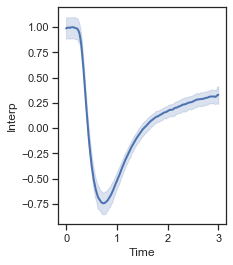

In [13]:
attn_group = d_nov[d_nov['Attention Level'].isin(['Full','Category',
                                                  'Side','None'])].groupby(['Experiment',
                                                                            'UniqueID','Time'], as_index=False).mean()

    # for e in ['Sustained','Variable']:
 
    #for level in ['Place','Face']:


missing_subs = []

plt.figure(figsize=(3, 4)); #print(c);

sb.lineplot(x='Time', y='Interp', 
            data=attn_group, 
            linewidth = 2, palette="RdBu")
plt.savefig('Average_Pres_All.pdf')

data=attn_group[(attn_group['Experiment']==e)]
sub_mean = data.groupby(['Time'],as_index=False).mean()
pup_mean = sub_mean['Interp'].mean()
sub_mean['mean_divide'] = np.nan
sub_mean.loc[sub_mean['Interp']<pup_mean,  'mean_divide'] = 0
sub_mean.loc[sub_mean['Interp']>pup_mean,  'mean_divide'] = 2
sub_mean.loc[sub_mean['Interp']==pup_mean, 'mean_divide'] = 1

mean_div_list = list(sub_mean['mean_divide'])

#new_div_list =  list(sub_mean['mean_divide'])

for idx,x in enumerate(mean_div_list):
    # for every item 

    #if idx != 0 :


    if x != mean_div_list[idx-1] and x!= mean_div_list[idx+1]:
        if mean_div_list[idx-1] == mean_div_list[idx+1]:
            mean_div_list[idx] = mean_div_list[idx+1]
            print('fixed one at index:'+str(idx))
        else:
            print("issue!")

sub_mean['mean_divide'] = mean_div_list

# sub_mean = attn_group[(attn_group['Experiment']==e)].groupby('Time', as_index=False).mean()


bins=[0]

for idx,row in sub_mean.iterrows():
    if idx != 0:

        if row['mean_divide']!=sub_mean['mean_divide'][idx-1]:
            plt.vlines(row['Time'], -2, 2)
            bins.append(sub_mean['Time'][idx-1])
            bins.append(row['Time'])

bins.append(3)
key_name = e; filename = '_PrevSeen_Bins.csv'
bin_df = pd.DataFrame({key_name:bins})
bin_df.to_csv(filename)


all_mean = sub_mean['Interp'].mean()

plt.hlines(all_mean, 0, 3)

plt.tight_layout()



plt.xlim((0 , 3)); plt.ylim((-2, 2.25)); plt.tick_params(labelsize=20)
plt.xlabel("Time from image onset (s)", size = 20); plt.ylabel("Pupil diameter (z-score)", size = 20)
plt.title(e+'_'+'MEAN'+'_'+'pres')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig_name = 'NEW_'+'ALL'+'_'+'MEAN'+'_'+'PREV_SEEN_PRES_CHUNK'+'.pdf'

plt.savefig(fig_name)
plt.show()

In [ ]:
bin_df


# Mean Plots with Chunking

In [14]:

d_nov['Familiarity'] = np.nan
d_nov.loc[(d_nov['Familiarity Rating']==1) | (d_nov['Familiarity Rating']==2), 'Familiarity'] = 'Unfamiliar'
d_nov.loc[(d_nov['Familiarity Rating']==3) | (d_nov['Familiarity Rating']==4), 'Familiarity'] = 'Familiar'
attn_group = d_nov.groupby(['Experiment','UniqueID','Familiarity','Time','Attention Level'], as_index=False).mean()

# for each experiment
for e in ['Sustained','Variable']:
    
    binnies =  pd.read_csv(e + '_PrevSeen_Bins.csv')
    binnies = list(binnies[e])
 
    # for each attention level
    for c in attn_group['Attention Level'].unique():
        
        # for each chunk
        chunk_1 = attn_group[(attn_group['Attention Level']==c)&(attn_group['Time']>=binnies[0])&(attn_group['Time']<=binnies[1])]
        chunk_2 = attn_group[(attn_group['Attention Level']==c)&(attn_group['Time']>=binnies[2])&(attn_group['Time']<=binnies[3])]
        chunk_3 = attn_group[(attn_group['Attention Level']==c)&(attn_group['Time']>=binnies[4])&(attn_group['Time']<=binnies[5])]
            

In [15]:
import scipy

chunk_1 = chunk_1.groupby(['UniqueID','Familiarity'], as_index=False).mean()
scipy.stats.ttest_ind(chunk_1[chunk_1['Familiarity']=='Familiar']['Interp'],chunk_1[chunk_1['Familiarity']=='Unfamiliar']['Interp'])

Ttest_indResult(statistic=-0.3845060376533877, pvalue=0.7015310539779991)

In [16]:
# Bin Chunk Stats

d_nov['Familiarity'] = np.nan
d_nov.loc[(d_nov['Familiarity Rating']==1) | (d_nov['Familiarity Rating']==2), 'Familiarity'] = 'Unfamiliar'
d_nov.loc[(d_nov['Familiarity Rating']==3) | (d_nov['Familiarity Rating']==4), 'Familiarity'] = 'Familiar'
attn_group = d_nov.groupby(['Experiment','UniqueID','Familiarity','Time','Attention Level'], as_index=False).mean()

Category chunk 1: 
Ttest_indResult(statistic=0.49692055276901326, pvalue=0.6204703665901024)

Category chunk 2: 
Ttest_indResult(statistic=-0.5517633851396101, pvalue=0.5824932750431914)

Category chunk 3: 
Ttest_indResult(statistic=-0.794951583454417, pvalue=0.42875653950772696)



Full chunk 1: 
Ttest_indResult(statistic=3.413204133888975, pvalue=0.0009562678456399819)

Full chunk 2: 
Ttest_indResult(statistic=5.730246012673014, pvalue=1.257184661314539e-07)

Full chunk 3: 
Ttest_indResult(statistic=5.486291036638828, pvalue=3.5910297906569936e-07)



None chunk 1: 
Ttest_indResult(statistic=-1.1261911372458397, pvalue=0.2629516048165466)

None chunk 2: 
Ttest_indResult(statistic=-1.2462673315170876, pvalue=0.21576322468731954)

None chunk 3: 
Ttest_indResult(statistic=-1.3789610098147906, pvalue=0.17117922671146363)



Side chunk 1: 
Ttest_indResult(statistic=-0.3845060376533877, pvalue=0.7015310539779991)

Side chunk 2: 
Ttest_indResult(statistic=-1.0600303055338007, pvalue=0.29203

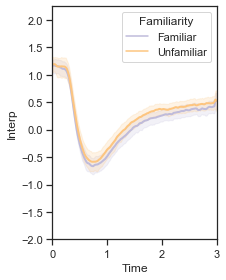

In [17]:
# # Bin Chunk Stats

# d_nov['Familiarity'] = np.nan
# d_nov.loc[(d_nov['Familiarity Rating']==1) | (d_nov['Familiarity Rating']==2), 'Familiarity'] = 'Unfamiliar'
# d_nov.loc[(d_nov['Familiarity Rating']==3) | (d_nov['Familiarity Rating']==4), 'Familiarity'] = 'Familiar'
# attn_group = d_nov.groupby(['Experiment','UniqueID','Familiarity','Time','Attention Level'], as_index=False).mean()

######################################

# for each experiment
#for e in ['Sustained','Variable']:
    
binnies =  pd.read_csv('_PrevSeen_Bins.csv')
binnies = list(binnies['Variable'])

# for each attention level
for c in attn_group['Attention Level'].unique():

        # for each chunk
        chunk_1 = attn_group[(attn_group['Attention Level']==c)&(attn_group['Time']>=binnies[0])&
                             (attn_group['Time']<=binnies[1])]
        chunk_1 = chunk_1.groupby(['UniqueID','Familiarity'], as_index=False).mean()
        one = scipy.stats.ttest_ind(chunk_1[chunk_1['Familiarity']=='Familiar']['Interp'],
                                    chunk_1[chunk_1['Familiarity']=='Unfamiliar']['Interp'])

        chunk_2 = attn_group[(attn_group['Attention Level']==c)&
                             (attn_group['Time']>=binnies[2])&(attn_group['Time']<=binnies[3])]
        chunk_2 = chunk_2.groupby(['UniqueID','Familiarity'], as_index=False).mean()
        two = scipy.stats.ttest_ind(chunk_2[chunk_2['Familiarity']=='Familiar']['Interp'],
                                    chunk_2[chunk_2['Familiarity']=='Unfamiliar']['Interp'])

        chunk_3 = attn_group[(attn_group['Attention Level']==c)
                             &(attn_group['Time']>=binnies[4])&(attn_group['Time']<=binnies[5])]
        chunk_3 = chunk_3.groupby(['UniqueID','Familiarity'], as_index=False).mean()
        three = scipy.stats.ttest_ind(chunk_3[chunk_3['Familiarity']=='Familiar']['Interp'],
                                      chunk_3[chunk_3['Familiarity']=='Unfamiliar']['Interp'])

        # pairwise t-tests

        # print result
        print(c+' chunk 1: ')
        print(one); print()

        print(c+' chunk 2: ')
        print(two); print()

        print(c+' chunk 3: ')
        print(three); print(); print(); print()


missing_subs = []

plt.figure(figsize=(3.25, 4)); #print(e);print(c);

# palette = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True)

sb.lineplot(x='Time', y='Interp', hue='Familiarity', 
            data=attn_group[#(attn_group['Experiment)==e & #&(attn_group['Category'] == level)
                           (attn_group['Attention Level']==c)], 
            linewidth = 2, palette='PuOr_r')
plt.ylim(-2, 2.25); plt.xlim(0,3)
plt.tight_layout()

plt.savefig('all_'+c+'_presentation.pdf')

# Novel Ind t-tests

In [18]:
d_nov['Attention Level'].unique()

array(['None', 'Full', 'Side', 'Category'], dtype=object)

Variable
Place


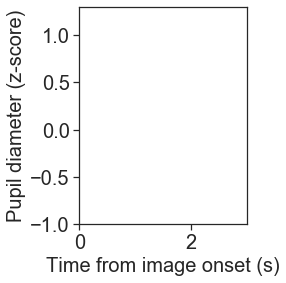

Variable
Face


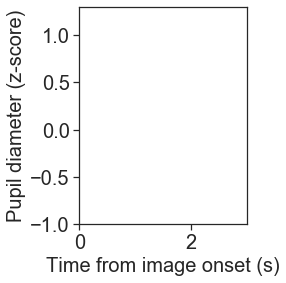

Sustained
Place


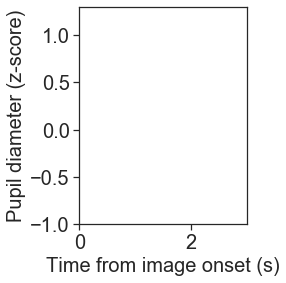

Sustained
Face


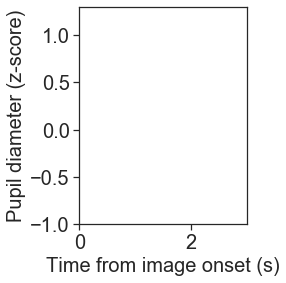

In [19]:
d_nov_novel = d_nov[d_nov['Attention Level'].isin(['Novel_Cued_Cat'])]

attn_group = d_nov.groupby(['Experiment','UniqueID','Familiarity Rating','Time','Category'], as_index=False).mean()

for e in ['Variable', 'Sustained']:
 
    for level in ['Place','Face']:

        plt.figure(figsize=(3, 4)); print(e);print(level)
 
        sb.lineplot(x='Time', y='Interp', hue='Familiarity Rating', 
                    data=attn_group[(attn_group['Experiment']==e)&(attn_group['Category'] == level)], 
                    linewidth = 2, palette="RdBu", legend=False)
                
        plt.xlim((0 , 3)); plt.ylim((-1, 1.3)); plt.tick_params(labelsize=20)
        plt.xlabel("Time from image onset (s)", size = 20); plt.ylabel("Pupil diameter (z-score)", size = 20)
        
        name = e+'_'+level+'.pdf'
        plt.savefig(name)
        plt.show()

In [20]:
binnies =  pd.read_csv('Variable' + '_PrevSeen_Bins.csv')
binnies

,Unnamed: 0,Variable
0,0,0.000000
1,1,0.402685
2,2,0.422819
3,3,1.630872
4,4,1.651007
5,5,3.000000


Sustained
Category
9
2
12
8


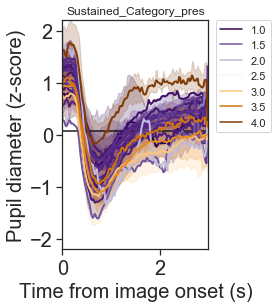

Sustained
Full
2
4
1
12


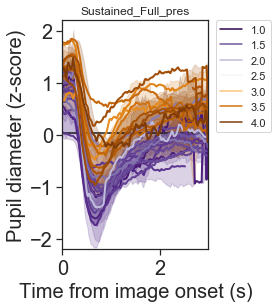

Sustained
None
5
4
10
6


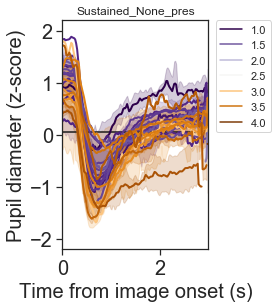

Sustained
Side
10
4
5
7


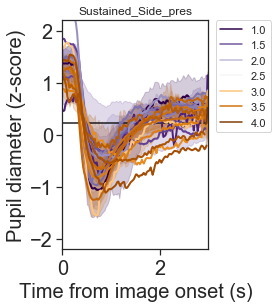

Variable
Category
7
0
11
4


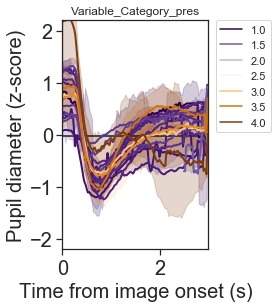

Variable
Full
2
3
3
6


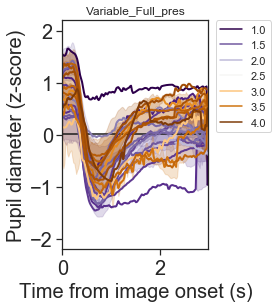

Variable
None
2
6
8
3


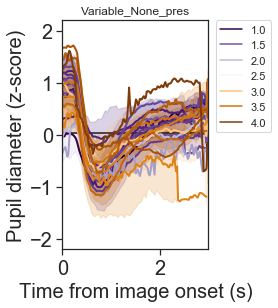

Variable
Side
4
6
7
7


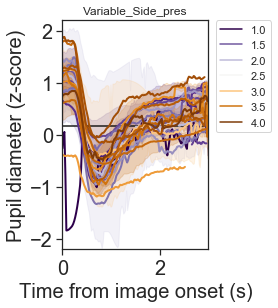

In [21]:
# d_nov['Familiarity'] = np.nan
# d_nov.loc[(d_nov['Familiarity Rating']==1) | (d_nov['Familiarity Rating']==2), 'Familiarity'] = 'Unfamiliar'
# d_nov.loc[(d_nov['Familiarity Rating']==3) | (d_nov['Familiarity Rating']==4), 'Familiarity'] = 'Familiar'
attn_group = d_nov.groupby(['Experiment','UniqueID','Familiarity','Time','Attention Level'], as_index=False).mean()

for e in ['Sustained','Variable']:
 
    #for level in ['Place','Face']:
    for c in attn_group['Attention Level'].unique():

        missing_subs = []

        plt.figure(figsize=(3, 4)); print(e);print(c);
        
        # palette = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True)

        sb.lineplot(x='Time', y='Interp', hue='Familiarity Rating', 
                    data=attn_group[(attn_group['Experiment']==e)#&(attn_group['Category'] == level)
                                   &(attn_group['Attention Level']==c)], 
                    linewidth = 2, palette='PuOr_r')
        plt.ylim(-2, 2.5)
        plt.xlim(0,3)
        plt.tight_layout()
        
        data=attn_group[(attn_group['Experiment']==e)#&(attn_group['Category'] == level)
                                   &(attn_group['Attention Level']==c)]
        
        sub_mean = data.groupby(['Time'],as_index=False).mean()

        
        all_mean = sub_mean['Interp'].mean()

        plt.hlines(all_mean, 0, 3)
        
        for rate in [1, 2, 3, 4]:
            print(len(attn_group[(attn_group['Experiment']==e)#&(attn_group['Category'] == level)
                                   &(attn_group['Attention Level']==c) & (attn_group['Familiarity Rating']==rate)]['UniqueID'].unique()))

        plt.xlim((0 , 3)); plt.ylim((-2.2, 2.2)); plt.tick_params(labelsize=20)
        plt.xlabel("Time from image onset (s)", size = 20); plt.ylabel("Pupil diameter (z-score)", size = 20)
        plt.title(e+'_'+c+'_'+'pres')

        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        fig_name = 'NEW_'+e+'_'+c+'_'+'PREV_SEEN_PRES'+'CHUNK.pdf'

        plt.savefig(fig_name)
        plt.show()